In [3]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 19.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 24.3 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 26.4 MB/s eta 0:00:0031m27.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.9 MB/s eta 0:00:0031m28.2 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 26.7 MB/s eta 0:00:00 MB/s eta 0:00:01


In [2]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install stable-baselines3[extra]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 78.2 MB/s eta 0:00:0031m85.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 74.0 MB/s eta 0:00:00


In [21]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [13]:
env_name='CartPole-v0'
env = gym.make(env_name,render_mode='human')

In [4]:
env.action_space.sample()

1

In [6]:
for episode in range(1,11):
    score=0
    state = env.reset()
    done=False
    while not done:
        env.render()
        action=env.action_space.sample()
        n_state, reward, done, info, l=env.step(action)
        score += reward
    print("Episode",episode,'score:',score)
env.close()

Episode 1 score: 14.0
Episode 2 score: 20.0
Episode 3 score: 26.0
Episode 4 score: 12.0
Episode 5 score: 19.0
Episode 6 score: 24.0
Episode 7 score: 12.0
Episode 8 score: 11.0
Episode 9 score: 16.0
Episode 10 score: 10.0


In [66]:
#MODEL TRAINING

In [12]:
pip install 'shimmy>=2.0'

Note: you may need to restart the kernel to use updated packages.


In [14]:
env = gym.make(env_name,render_mode='human')
env = DummyVecEnv([lambda:env])
model=PPO('MlpPolicy',env,verbose=1)

Using cpu device


/home/sd/myenv/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [16]:
model.learn(total_timesteps=20000)

-----------------------------
| time/              |      |
|    fps             | 47   |
|    iterations      | 1    |
|    time_elapsed    | 43   |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 47          |
|    iterations           | 2           |
|    time_elapsed         | 86          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.008031268 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.686      |
|    explained_variance   | -0.00586    |
|    learning_rate        | 0.0003      |
|    loss                 | 8.35        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0181     |
|    value_loss           | 51.9        |
-----------------------------------------
----------------------------------

In [17]:
evaluate_policy(model,env,n_eval_episodes=10,render=True)
#env.close()

/home/sd/myenv/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(np.float64(200.0), np.float64(0.0))

In [18]:
l=[]
for episode in range(1,11):
    score=0
    obs = env.reset()
    done=False
    while not done:
        env.render()
        action,_= model.predict(obs)
        obs, reward, done, info=env.step(action)
        score += reward
    l.append(score)
    print("Episode",episode,'score:',score)

Episode 1 score: [200.]
Episode 2 score: [200.]
Episode 3 score: [200.]
Episode 4 score: [200.]
Episode 5 score: [200.]
Episode 6 score: [200.]
Episode 7 score: [200.]
Episode 8 score: [157.]
Episode 9 score: [200.]
Episode 10 score: [200.]


In [19]:
env.close()

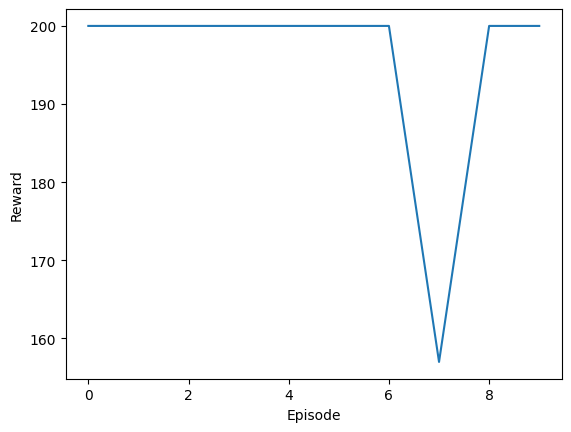

In [20]:
import matplotlib.pyplot as plt
plt.plot(l)
plt.ylabel("Reward")
plt.xlabel("Episode")
plt.show()